In [1]:
import gymnasium as gym
import math
import random
import matplotlib
import matplotlib.pyplot as plt
from collections import namedtuple, deque
from itertools import count

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [2]:
# set up matplotlib
is_ipython = 'inline' in matplotlib.get_backend()
if is_ipython:
    from IPython import display

plt.ion()

In [3]:
episode_durations = []


def plot_durations(show_result=False):
    plt.figure(1)
    durations_t = torch.tensor(episode_durations, dtype=torch.float)
    if show_result:
        plt.title('Result')
    else:
        plt.clf()
        plt.title('Training...')
    plt.xlabel('Episode')
    plt.ylabel('Duration')
    plt.plot(durations_t.numpy())
    # Take 100 episode averages and plot them too
    if len(durations_t) >= 100:
        means = durations_t.unfold(0, 100, 1).mean(1).view(-1)
        means = torch.cat((torch.zeros(99), means))
        plt.plot(means.numpy())

    plt.pause(0.001)  # pause a bit so that plots are updated
    if is_ipython:
        if not show_result:
            display.display(plt.gcf())
            display.clear_output(wait=True)
        else:
            display.display(plt.gcf())

In [6]:
from tensorforce import Agent, Environment
from tensorforce.environments import OpenAIGym
from tensorforce.execution import Runner

env = Environment.create(environment='gym', level="MountainCar-v0", visualize=True, max_episode_timesteps=200)

# Instantiate a Tensorforce agent
agent = Agent.create(
    agent='a2c',
    environment=env,  # alternatively: states, actions, (max_episode_timesteps)
    batch_size=128,  
)

num_episodes = 4000

runner = Runner(
    agent=agent,
    environment=env,
    max_episode_timesteps=200,
    # num_parallel=5, remote='multiprocessing',
)

runner.run(num_episodes=num_episodes)

# runner.run(num_episodes=100, evaluation=True)

runner.close()

# for episode in range(num_episodes):
#     episode_states = list()
#     episode_internals = list()
#     episode_actions = list()
#     episode_terminal = list()
#     episode_reward = list()

#     states = env.reset()
#     # agent.reset()
#     internals = agent.initial_internals()
#     # print('states = ', states, 'internals = ', internals)
#     terminal = False
#     sum_rewards = 0.0
#     # t = 0
#     while not terminal:                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
#         episode_states.append(states)
#         episode_internals.append(internals)
#         actions, internals = agent.act(states=states, internals=internals, independent=True)
#         episode_actions.append(actions)
#         states, terminal, reward = env.execute(actions=actions)
#         # print(states, terminal, reward)
#         # agent.observe(reward, terminal)
#         # env.render()
#         episode_terminal.append(terminal)
#         episode_reward.append(reward)
#         sum_rewards += reward
#         # t += 1
#     print('Episode {}: {}'.format(episode, sum_rewards))
    
#     agent.experience(
#         states=episode_states, internals=episode_internals, actions=episode_actions,
#         terminal=episode_terminal, reward=episode_reward
#     )

#     agent.update()
    
#     episode_durations.append(sum_rewards)
#     plot_durations()

# print('Complete')
# plot_durations(show_result=True)
# plt.ioff()
# plt.show()

# agent.close()
# env.close()

TensorforceError: Invalid value for Runner argument environment given num_parallel: OpenAIGym(MountainCar-v0) is Environment instance, but specification dict is required.

[ 0.00492039 -0.0377483   0.04949679  0.03100904] OrderedDict([('policy', OrderedDict()), ('baseline', OrderedDict())])
OrderedDict()
Episode 599: 8.0


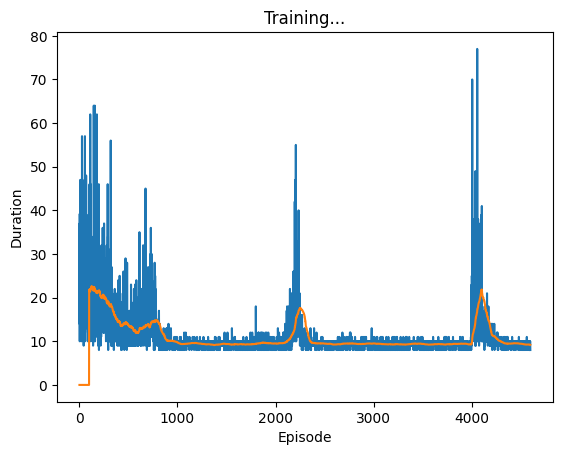

<Figure size 640x480 with 0 Axes>

In [ ]:
from a2c import A2CAgent
from tensorforce.environments import OpenAIGym
from gym.spaces import Discrete

env = OpenAIGym(level="CartPole-v1")
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

num_episodes = 600
observation_space = env.states()
action_space = Discrete(env.actions()['num_values'])
# print(action_space['num_values'])
# print(action_space)
print(env.reset())
# state, info = env.reset()
# print(len(state))
a2c_agent = A2CAgent(env, observation_space=observation_space, action_space=action_space, batch_size=365) 

# Train for 100 episodes
for episode in range(num_episodes):
    # Record episode experience
    episode_states = list()
    episode_internals = list()
    episode_actions = list()
    episode_terminal = list()
    episode_reward = list()

    # Episode using independent-act and agent.intial_internals()
    states = env.reset()
    a2c_agent.reset(states)
    internals = a2c_agent.initial_internals()
    print(states, internals)
    print(internals['policy'])
    terminal = False
    sum_rewards = 0.0
    t = 0
    # break
    while not terminal:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
        episode_states.append(states)
        # episode_internals.append(internals)
        # a2c_agent.observe(states, r=0.0)
        
        actions = a2c_agent.act()
        episode_actions.append(actions)
        states, terminal, reward = env.execute(actions=actions)
        # a2c_agent.s = states
        # a2c_agent.r = reward
        a2c_agent.observe(states, reward, terminal)
        episode_terminal.append(terminal)
        episode_reward.append(reward)
        sum_rewards += reward
        # t += 1
    print('Episode {}: {}'.format(episode, sum_rewards))

    # done = terminal
        
    # if done:
    # break
    
    # print('states = ', episode_states)
    # # print('internals = ', episode_internals)
    # print('actions = ', episode_actions)
    # print('terminal = ', episode_terminal)
    # print('reward = ', episode_reward)
    
    # Feed recorded experience to agent
    a2c_agent.experience(
        states=episode_states, actions=episode_actions,
        terminal=episode_terminal, reward=episode_reward,
        # internals=episode_internals
    )

    # Perform update
    a2c_agent.update()
    
    episode_durations.append(sum_rewards)
    plot_durations()

In [ ]:
# Evaluate for 100 episodes
sum_rewards = 0.0
eval_episodes = 10

for i_episode in range(eval_episodes):
    # Initialize the environment and get it's state
    states = env.reset()
    a2c_agent.reset(states)
    internals = a2c_agent.initial_internals()
    terminal = False
    
    for t in count():
        actions = a2c_agent.act()
        states, terminal, reward = env.execute(actions=actions)
        a2c_agent.s = states
        a2c_agent.r = reward
        
        done = terminal
        
        if done:
            episode_durations.append(t + 1)
            plot_durations()
            break

print('Complete')
plot_durations(show_result=True)
plt.ioff()
plt.show()

# Close agent and environment
a2c_agent.close()
env.close()

TensorforceError: Calling agent.act must be preceded by agent.observe for training, or agent.act argument 'independent' must be passed as True.

In [ ]:

for _ in range(eval_episodes):
    states = env.reset()
    a2c_agent.reset(states)
    internals = a2c_agent.initial_internals()
    terminal = False
    while not terminal:
        actions, internals = a2c_agent.act()
        states, terminal, reward = env.execute(actions=actions)
        a2c_agent.s = states
        a2c_agent.r = reward
        sum_rewards += reward
print('Mean evaluation return:', sum_rewards / 100.0)

AttributeError: 'NoneType' object has no attribute 'reset'